In [9]:
# Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [10]:
bhp_0 = pd.read_csv(r"C:\Users\Shyam Rajamani\Documents\Devika\JOB HUNT\Bangalore House Prices\Bengaluru_House_Data.csv")
bhp_0.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
bhp_0.shape


(13320, 9)

In [13]:
bhp_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# There are 3 numerical variables and 6 categorical variables


In [12]:
bhp_0.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


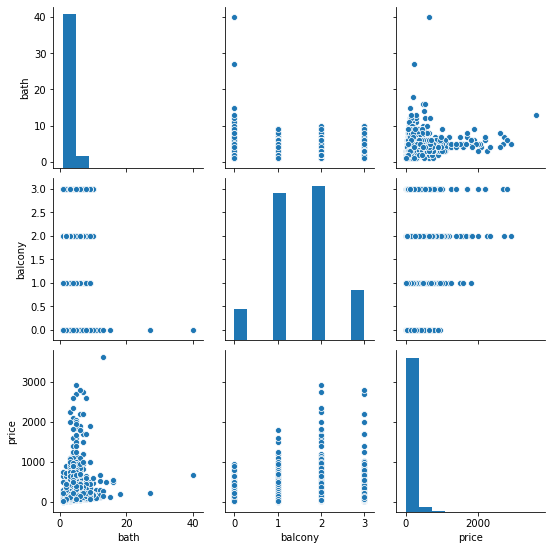

In [14]:
import seaborn as sns
sns.pairplot(bhp_0)

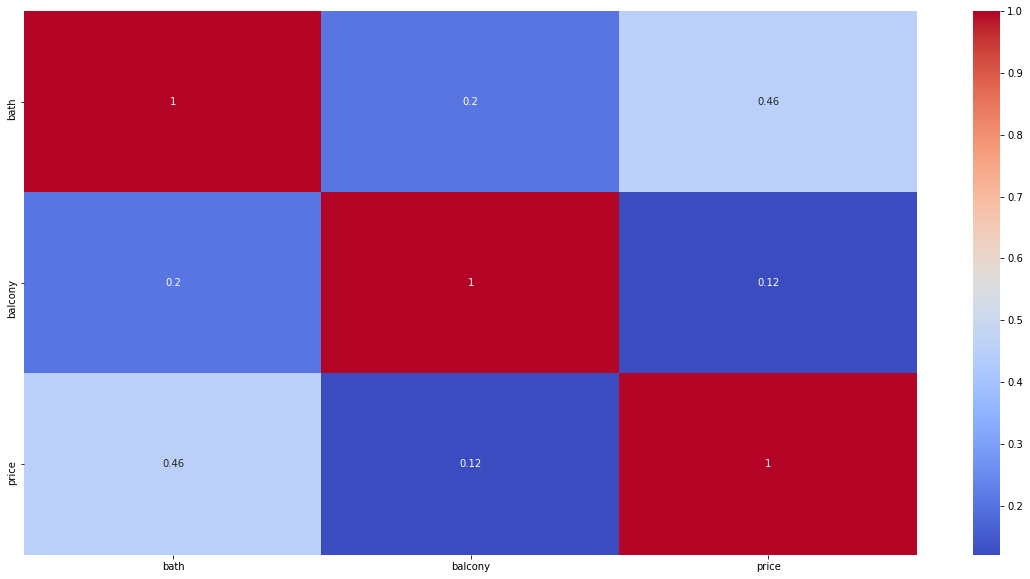

In [16]:
# correlation heatmap

num_vars = ["bath", "balcony", "price"]
sns.heatmap(bhp_0[num_vars].corr(), cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price

# Data Cleaning

In [18]:
# Count of data in each location

bhp_0.groupby("area_type")["area_type"].agg("count")


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [21]:
bhp_0.isnull().mean()*100


area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [ ]:
# Drop unnecessary columns

bhp_1 = bhp_0.drop(["availability","society","balcony"],axis="columns")
bhp_1.head()


In [22]:
# Drop null values.. can be replaced with median if needed

bhp_2 = bhp_1.dropna()
bhp_2.isnull().sum()


area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
bhp_2.shape


(13246, 6)

In [24]:
bhp_2["size"].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
# Remove unnecessary part from size and create a new int column

bhp_2["bhk"] = bhp_2["size"].apply(lambda x: int(x.split(" ")[0]))


C:\Users\Shyam Rajamani\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
bhp_2.head()


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [27]:
bhp_2.isnull().sum()


area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [16]:
bhp_2["bhk"].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
bhp_2[bhp_2.bhk > 10]


,area_type,location,size,total_sqft,bath,price,bhk
459,Super built-up Area,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,Plot Area,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,Plot Area,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,Super built-up Area,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Plot Area,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,Super built-up Area,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [28]:
bhp_2["total_sqft"].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
# Find the total_sqft values which are not proper

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

bhp_2[~bhp_2["total_sqft"].apply(is_float)].head(15)


,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
# Convert range values to numeric values and ignore the values in different unit

def convert_range_to_num(x):
    sqft = x.split("-")
    if len(sqft) == 2:
        return (float(sqft[0])+float(sqft[1]))/2
    try:
        return float(x)
    except:
        return None    


In [31]:
convert_range_to_num('1450')

1450.0

In [32]:
convert_range_to_num('1450-2500')

1975.0

In [33]:
convert_range_to_num('4125Perch')

In [34]:
# Apply the function on dataset

bhp_3=bhp_2.copy()
bhp_3["total_sqft"] = bhp_3["total_sqft"].apply(convert_range_to_num)
bhp_3.head()


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
bhp_3.loc[30]


area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                    2475
bath                             4
price                          186
bhk                              4
Name: 30, dtype: object

# Feature Engineering

In [36]:
#Price per sqft

bhp_4 = bhp_3.copy()
bhp_4["price_per_sqft"] = bhp_4["price"]*100000/bhp_4["total_sqft"]
bhp_4.head()


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
len(bhp_4.location.unique())


1304

In [38]:
# Dimensionality reduction (avoid dimensionality curse)

bhp_4.location = bhp_4.location.apply(lambda x: x.strip())
location_stats = bhp_4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats


location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [43]:
len(location_stats[location_stats<=10])


1052

In [44]:
location_stats_lessthan10 = location_stats[location_stats<=10]
location_stats_lessthan10


location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [45]:
len(bhp_4.location.unique())


242

In [46]:
bhp_4.location = bhp_4.location.apply(lambda x: "other" if x in location_stats_lessthan10 else x)
len(bhp_4.location.unique())


242

In [47]:
bhp_4.head(10)


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection

We use domain knowledge and some simple techniques

In [48]:
"""## Finding Outlier and Removing"""
 
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()


bath


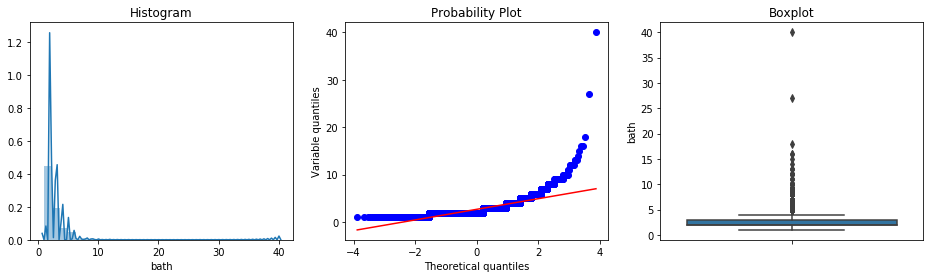

total_sqft


C:\Users\Shyam Rajamani\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Shyam Rajamani\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Shyam Rajamani\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


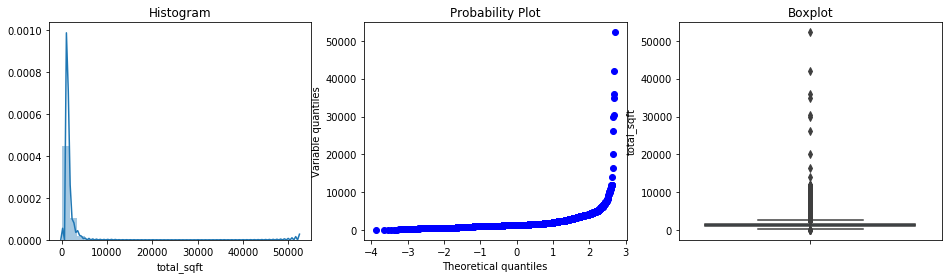

bhk


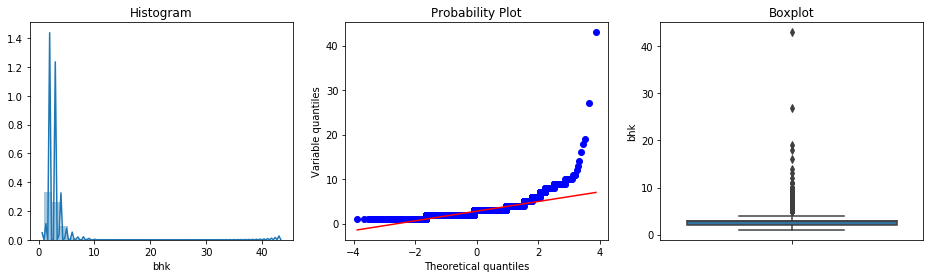

price


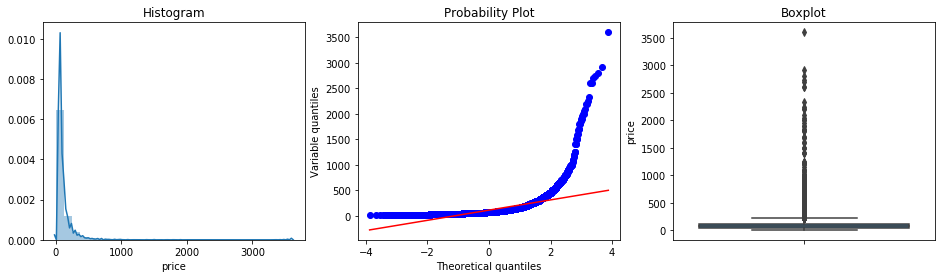

In [50]:
num_var = ["bath","total_sqft","bhk","price"]
for var in num_var:
  print("{}".format(var))
  diagnostic_plots(bhp_4, var)

In [51]:
bhp_4[bhp_4.total_sqft/bhp_4.bhk < 300].head(10)


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Plot Area,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Plot Area,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,Plot Area,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [52]:
len(bhp_4[bhp_4.total_sqft/bhp_4.bhk < 300])


744

In [53]:
bhp_4.shape


(13246, 8)

In [54]:
bhp_5 = bhp_4[~(bhp_4.total_sqft/bhp_4.bhk < 300)]
bhp_5.shape


(12502, 8)

In [55]:
bhp_5.price_per_sqft.describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [56]:
# Remove extreme values using standard deviation

def remove_ppsoutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st =np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [57]:
bhp_6 = remove_ppsoutliers(bhp_5)
bhp_6.shape


(10241, 8)

In [59]:
# Visualisation 

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] =(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="red", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+", color="green", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


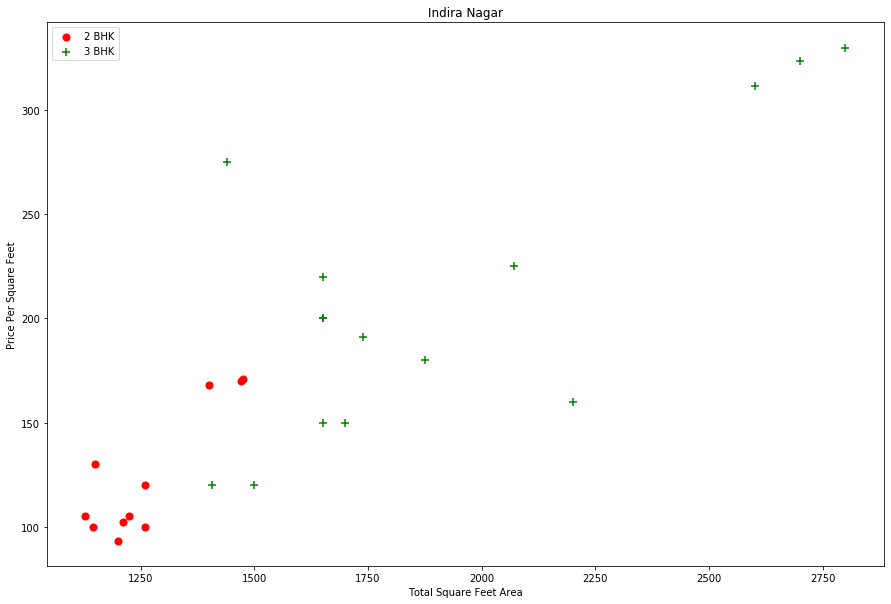

In [61]:
plot_scatter_chart(bhp_6,"Indira Nagar")


In [62]:
# Remove outliers based on location

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]= {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
                }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")


In [63]:
bhp_7 = remove_bhk_outliers(bhp_6)
bhp_7.shape


(7329, 8)

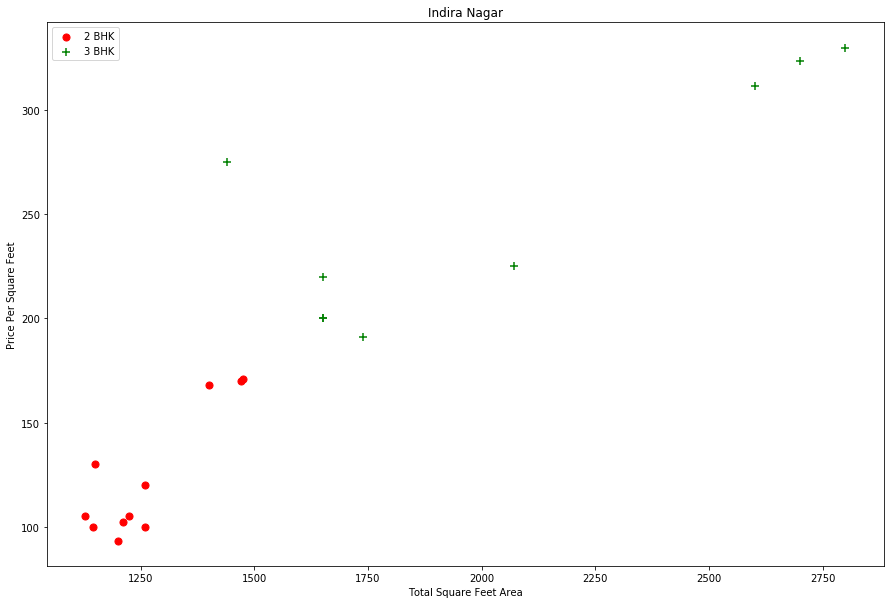

In [64]:
plot_scatter_chart(bhp_7,"Indira Nagar")


Text(0, 0.5, 'Count')

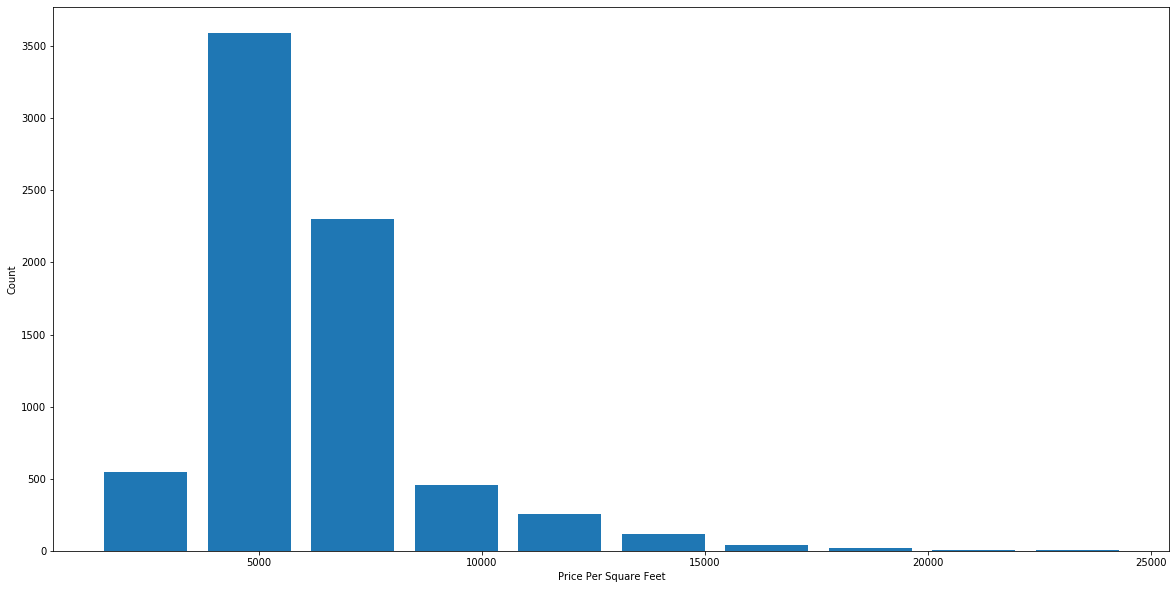

In [65]:
# Number of properties per sqft

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(bhp_7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [66]:
bhp_7.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

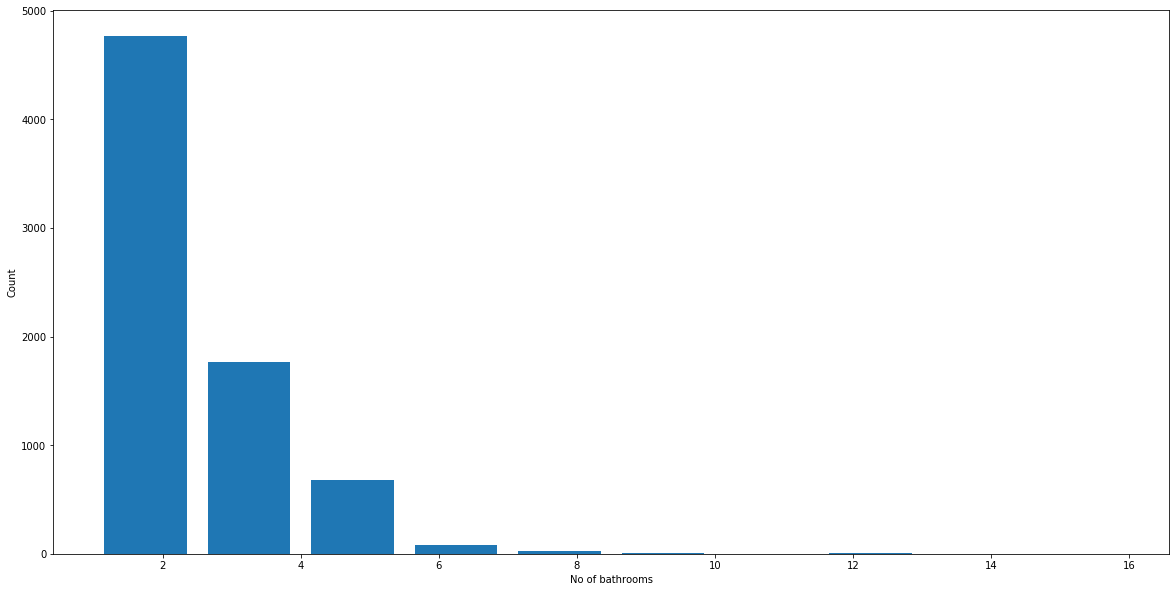

In [46]:
plt.hist(bhp_7.bath,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")


In [ ]:
bhp_7[bhp_7.bath>10]


In [67]:
bhp_7[bhp_7.bath > bhp_7.bhk+2]


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [68]:
bhp_8 = bhp_7[bhp_7.bath < bhp_7.bhk+2]
bhp_8.shape


(7251, 8)

In [69]:
#Drop unnecessary columns

bhp_9 = bhp_8.drop(["area_type","size","price_per_sqft"],axis ="columns")
bhp_9.head()


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Build ML model

In [70]:
# As Ml model can't interpret text data, The location column has to be converted to numeric
# Use one-hot encoding/dummies

pd.get_dummies(bhp_9.location)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
dummies = pd.get_dummies(bhp_9.location)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Avoid a dummy variable trap we should have 1 less dummies column

bhp_10 = pd.concat([bhp_9,dummies.drop("other",axis="columns")],axis="columns")
bhp_10.head()


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
bhp_11 = bhp_10.drop("location",axis="columns")
bhp_11.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
bhp_11.shape


(7251, 245)

In [76]:
X = bhp_11.drop("price",axis="columns")
X.head()


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = bhp_11.price
y.head()


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=10)


In [79]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8452277697874251

In [80]:
# k-fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [81]:
# Try different model to find best model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Function

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "linear_regression" : {
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True,False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ["random","cyclic"]
            }
        },
        "decision_tree" : {
            "model" : DecisionTreeRegressor(),
            "params" : {
                "criterion" : ["mse","friedman_mse"],
                "splitter" : ["best","random"]
            }
        }
    }
    
    scores =[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model" : algo_name,
            "best_score" : gs.best_score_,
            "best_params" : gs.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])


In [83]:
find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687481,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.725682,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [84]:
# Predict Price

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]= sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]


In [85]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)


83.49904677154886

In [86]:
predict_price("Indira Nagar", 1000, 2, 2)


181.27815484007274

In [87]:
predict_price("1st Phase JP Nagar", 1000, 2, 3)


81.72616900729965

In [89]:
import pickle
with open ("bangalore_house_price_model.pickle","wb") as f:
    pickle.dump(lr_clf,f)


In [90]:
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
